In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-personality-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1546318%2F2549419%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T161020Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0e3d0cb84fa510ae81977b5ecee1d1f217420afea3d09b1f638fb851d5132cd1d050787cb30cf9cdcd0cec4789242dbccfef234f1c1a2819006792dcc16adece6e6992359c9e52464069195538309e04586ee2e6fc07bd9334a0679c98751b13f8c1fb7caec6d9250e89bac6e61235ba5f9e75bde73a3d37093ab45c049b14b5820977d13d32851f60a753fc88f7481cc747c0bac40b226552a9eae0ebe1f3a7160de1e92afe61a152e2668f8899df1d17ce6b924ad170601e70b3ccb2adea39748b27bdea7680f9f1294b2960eb8082da1d0adab83671344448a1022c843ab89079484f4d2074921e22e3c68dfada5f625ba879e2a83e818036a47e0251ce25,clientsdata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4879851%2F8229128%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T161020Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5017c45ed9196e47643f3b05c8f51a14bb1b51acadf077165288a50eaa306e02882581ccec41b359b415c7211e331f0928dee1912721fb4cf000fcf644b9e135f324648945c561eec1e7b16bc54a487340729c98b8c0ff3829a76914b363fd21039febdcc229099b9a194ca17e4670f9850ae08179486f7c992a27fa834f59ba28e83ad6ec1f70d101839b072ef174ea28a06fd4aa052f232e99a73a9fcb99e22b66e4ef5f9a14e2099a5eb09458e6a25bdb87a4727a20fbb720cf40e570a9627e0e8d8465830018334f846e580eacf6248c057f2fdaf996d008be5246a9672dcf6d3e5b2d42903d8f280f4842c07cb40cc4d8429a81d71bd43c550872f61632'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 63450 bytes downloaded
Downloaded and uncompressed: customer-personality-analysis
[==================================================] 63423 bytes downloaded
Downloaded and uncompressed: clientsdata
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
customer = pd.read_csv("/kaggle/input/clientsdata/data.csv")

customer.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [ ]:
customer.shape

(2241, 29)

In [ ]:
customer.isnull().sum()

ID                      1
Year_Birth              1
Education               1
Marital_Status          1
Income                 25
Kidhome                 1
Teenhome                1
Dt_Customer             1
Recency                 1
MntWines                1
MntFruits               1
MntMeatProducts         1
MntFishProducts         1
MntSweetProducts        1
MntGoldProds            1
NumDealsPurchases       1
NumWebPurchases         1
NumCatalogPurchases     1
NumStorePurchases       1
NumWebVisitsMonth       1
AcceptedCmp3            1
AcceptedCmp4            1
AcceptedCmp5            1
AcceptedCmp1            1
AcceptedCmp2            1
Complain                1
Z_CostContact           1
Z_Revenue               1
Response                1
dtype: int64

In [ ]:
customer[customer.isna().any(axis=1)]

# we can see the 2240 no row is all NaN lets drop it

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994.0,1983.0,Graduation,Married,NaN,1.0,0.0,15-11-2013,11.0,5.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
27,5255.0,1986.0,Graduation,Single,NaN,1.0,0.0,20-02-2013,19.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
43,7281.0,1959.0,PhD,Single,NaN,0.0,0.0,05-11-2013,80.0,81.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
48,7244.0,1951.0,Graduation,Single,NaN,2.0,1.0,01-01-2014,96.0,48.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
58,8557.0,1982.0,Graduation,Single,NaN,1.0,0.0,17-06-2013,57.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
71,10629.0,1973.0,2n Cycle,Married,NaN,1.0,0.0,14-09-2012,25.0,25.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
90,8996.0,1957.0,PhD,Married,NaN,2.0,1.0,19-11-2012,4.0,230.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
91,9235.0,1957.0,Graduation,Single,NaN,1.0,1.0,27-05-2014,45.0,7.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
92,5798.0,1973.0,Master,Together,NaN,0.0,0.0,23-11-2013,87.0,445.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
128,8268.0,1961.0,PhD,Married,NaN,0.0,1.0,11-07-2013,23.0,352.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [ ]:
customer_subset = customer[customer['Education'].notnull()]
customer_subset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(customer_subset[['Income']])

customer_subset['Income'] = impute.transform(customer_subset[['Income']])

customer_subset.isnull().any()

<ipython-input-7-69f29a444a65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_subset['Income'] = impute.transform(customer_subset[['Income']])


ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [ ]:
customer = customer_subset
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-null   float64
 15  NumDealsPurchases    2240 non-null   float6

In [ ]:
print("Education: ",customer['Education'].unique())
print("Marital_Status: ",customer['Marital_Status'].unique())
print("Dt_Customer: ",customer['Dt_Customer'].unique())



Education:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status:  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer:  ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-2013' '08-04-2013' '

In [ ]:
customer['Education'] = customer['Education'].map({'Graduation':0, 'PhD':1, 'Master':2, 'Basic':3, '2n Cycle':4})
customer['Marital_Status'] = customer['Marital_Status'].map({'Single':0, 'Together':1, 'Married':2, 'Divorced':3, 'Widow':4, 'Alone':5, 'Absurd':6, 'YOLO':7})


In [ ]:
# First, convert string column to date column
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"],dayfirst=True)

# Extract just the month from the converted column
customer["Dt_Customer_Month"] = customer["Dt_Customer"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
customer[['Dt_Customer', 'Dt_Customer_Month']].head()

,Dt_Customer,Dt_Customer_Month
0,2012-09-04,9
1,2014-03-08,3
2,2013-08-21,8
3,2014-02-10,2
4,2014-01-19,1


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   int64         
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-null   f

In [ ]:
# Create a list of the columns to average
run_columns = ["NumWebPurchases", "NumStorePurchases","NumCatalogPurchases"]

# Use apply to create a mean column
customer["NumPurchases"] = customer.apply(lambda row: row[run_columns].sum(), axis=1)

customer = customer.drop(run_columns, axis=1)


customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Month,NumPurchases
0,5524.0,1957.0,0,0,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,9,22.0
1,2174.0,1954.0,0,0,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,3,4.0
2,4141.0,1965.0,0,1,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,8,20.0
3,6182.0,1984.0,0,1,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2,6.0
4,5324.0,1981.0,1,2,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,0,2,61223.0,0.0,1.0,2013-06-13,46.0,709.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,6,16.0
2236,4001.0,1946.0,1,1,64014.0,2.0,1.0,2014-06-10,56.0,406.0,...,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0,6,15.0
2237,7270.0,1981.0,0,3,56981.0,0.0,0.0,2014-01-25,91.0,908.0,...,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1,18.0
2238,8235.0,1956.0,2,1,69245.0,0.0,1.0,2014-01-24,8.0,428.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1,21.0


In [ ]:
to_drop = ["Z_Revenue", "Z_CostContact","ID","Dt_Customer"]

customer = customer.drop(to_drop, axis=1)




In [ ]:
corr = customer.corr()
corr

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Month,NumPurchases
Year_Birth,1.000000,0.036971,-0.138746,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325,0.024246,-0.162999
Education,0.036971,1.000000,-0.000703,-0.092242,0.028878,-0.052026,-0.025753,-0.067017,-0.060599,-0.075378,...,0.034059,0.008082,-0.023010,-0.034304,-0.028134,-0.023062,0.001382,-0.018980,0.044186,-0.077030
Marital_Status,-0.138746,-0.000703,1.000000,0.023816,-0.050514,0.095124,-0.021048,0.034272,0.014416,-0.031207,...,0.007321,0.000015,0.020614,0.014422,0.007545,0.000339,-0.019133,-0.006953,0.004983,0.046421
Income,-0.160942,-0.092242,0.023816,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.132756,-0.014888,0.622294
Kidhome,0.230176,0.028878,-0.050514,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.023571,-0.568637
Teenhome,-0.352111,-0.052026,0.095124,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,-0.014124,0.037902
Recency,-0.019871,-0.025753,-0.021048,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.014040,0.006410
MntWines,-0.157773,-0.067017,0.034272,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.046139,0.756490
MntFruits,-0.017917,-0.060599,0.014416,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.003741,0.520686
MntMeatProducts,-0.030872,-0.075378,-0.031207,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.018390,0.623315


<Axes: >

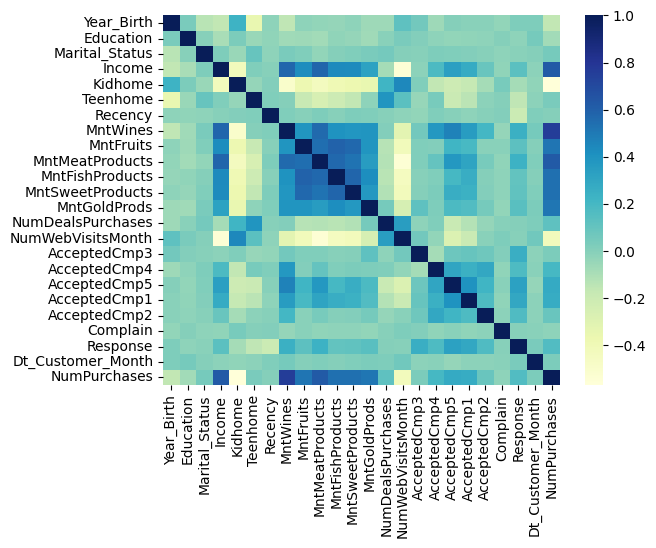

In [ ]:
import seaborn as sns

sns.heatmap(corr, cmap = 'YlGnBu')

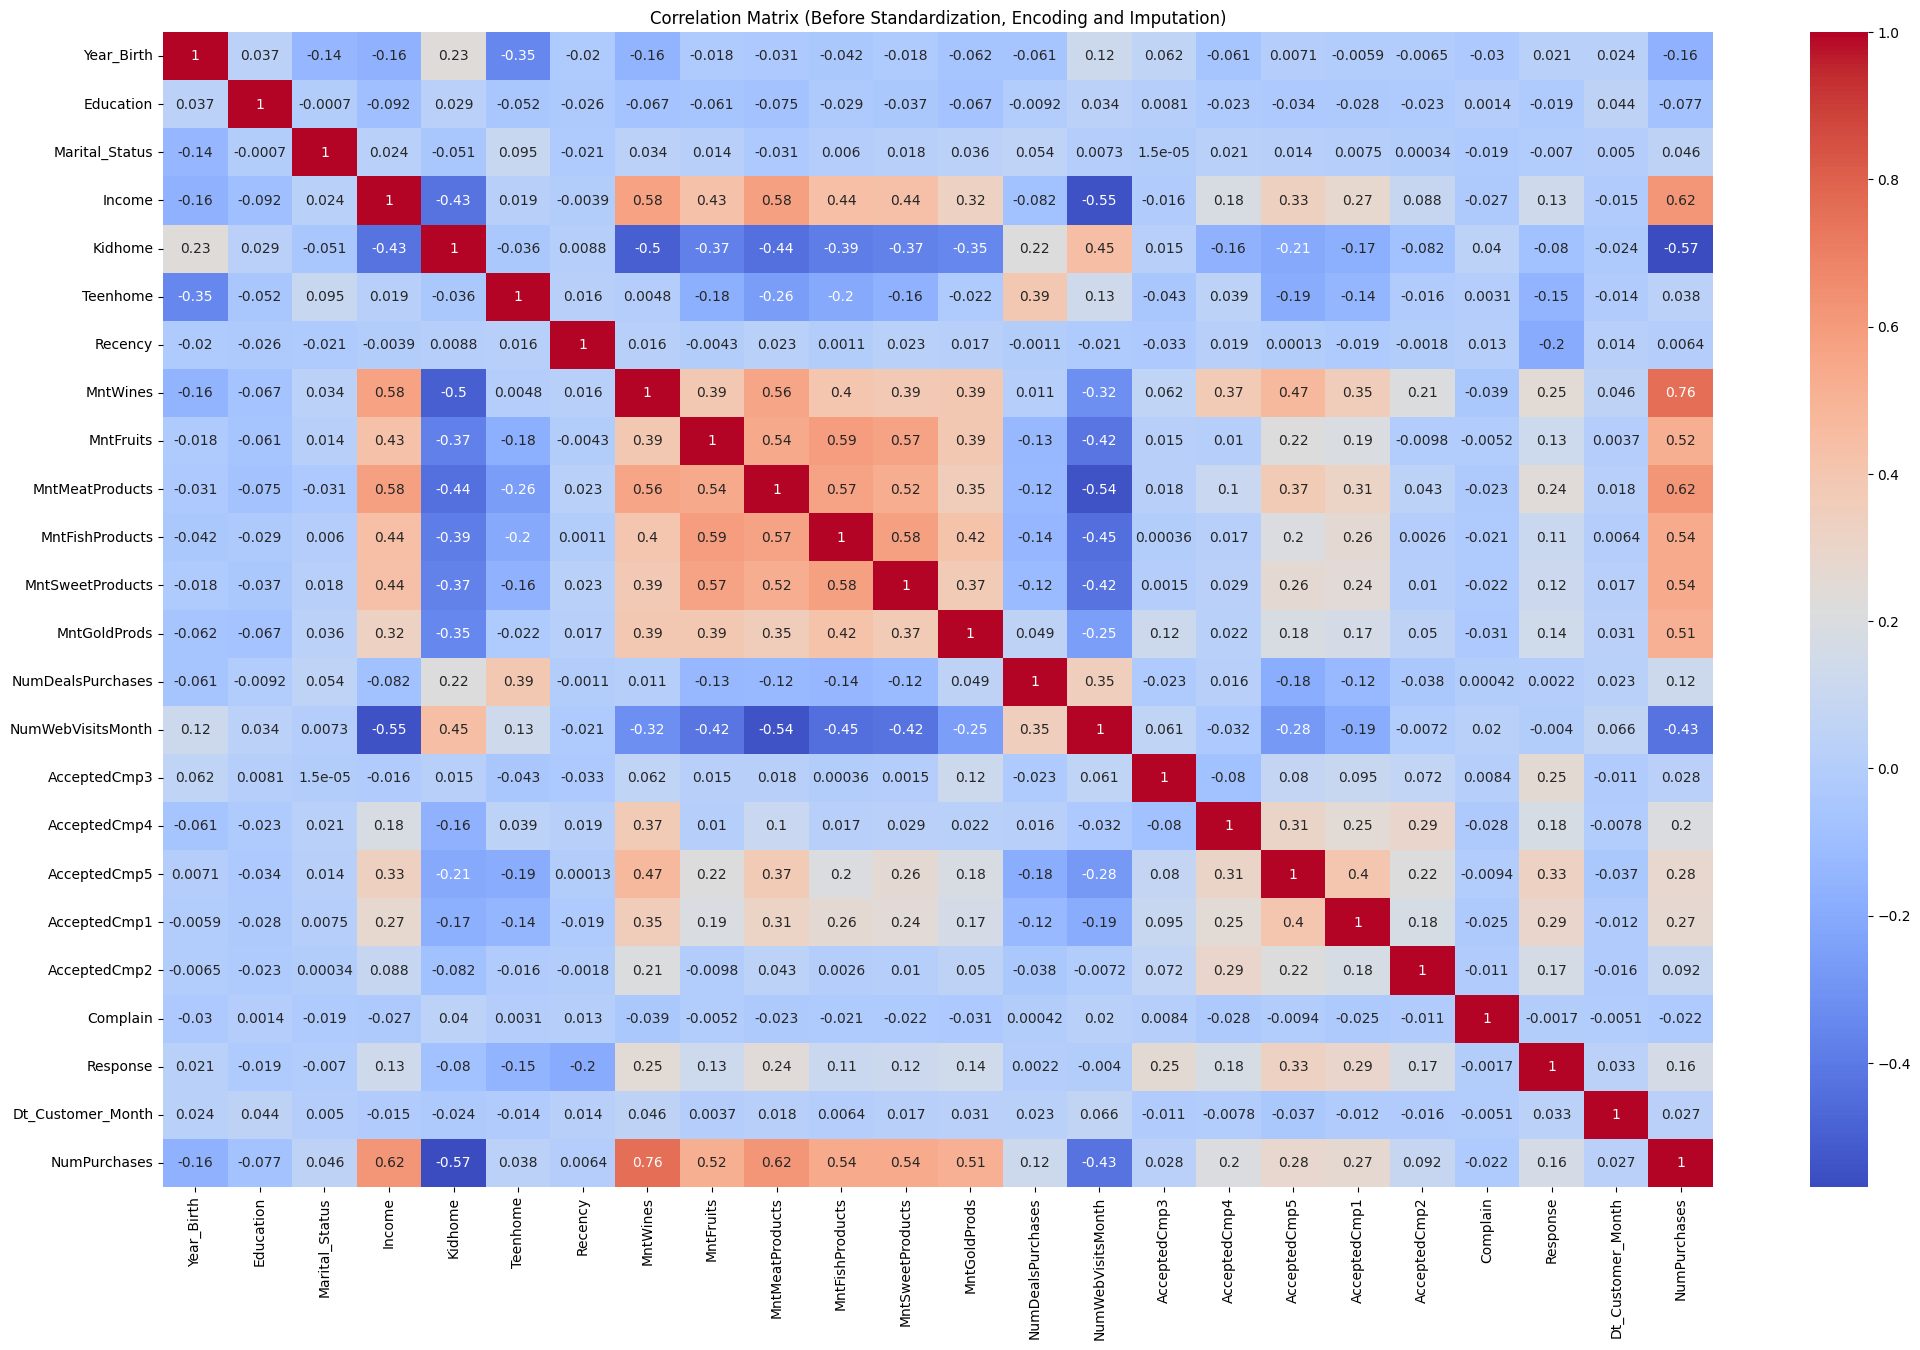

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Before Standardization, Encoding and Imputation)')
plt.show()

In [ ]:
# Filter correlation matrix to find correlations greater than 0.75
corr = customer.corr()
high_correlation = corr[abs(corr) > 0.75]

# Drop diagonal and duplicate entries
high_correlation = high_correlation.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Print or use the resulting correlation matrix
print(high_correlation)

                   Year_Birth  Education  Marital_Status  Income  Kidhome  \
Year_Birth                1.0        NaN             NaN     NaN      NaN   
Education                 NaN        1.0             NaN     NaN      NaN   
Marital_Status            NaN        NaN             1.0     NaN      NaN   
Income                    NaN        NaN             NaN     1.0      NaN   
Kidhome                   NaN        NaN             NaN     NaN      1.0   
Teenhome                  NaN        NaN             NaN     NaN      NaN   
Recency                   NaN        NaN             NaN     NaN      NaN   
MntWines                  NaN        NaN             NaN     NaN      NaN   
MntFruits                 NaN        NaN             NaN     NaN      NaN   
MntMeatProducts           NaN        NaN             NaN     NaN      NaN   
MntFishProducts           NaN        NaN             NaN     NaN      NaN   
MntSweetProducts          NaN        NaN             NaN     NaN      NaN   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(customer.drop("NumPurchases", axis=1), customer["NumPurchases"] , random_state=1, test_size= 0.3)

scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)


(1568, 23)
(672, 23)


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train_scaled, y_train)

yPrediction = clf.predict(X_test_scaled)

yPrediction


array([22.66146808, 20.00073399,  8.05738917, 17.9797798 , 22.82915484,
       14.19299983, 20.52837155, 21.68233522, 11.20138237, 12.48743031,
       18.224858  , 10.43931694,  9.31871963, 15.14116112, 16.06870852,
       16.42399706,  5.81905377,  6.00559016,  6.79529281, 22.4562368 ,
        6.66664253, 13.01143491, 15.66213036,  4.42562435,  7.0104222 ,
       12.21632316, 19.21203308,  9.24644157,  9.31871963, 12.90191166,
       19.267952  ,  4.89496697,  4.06677278, 18.18294154, 18.51828935,
       16.89653758,  9.25725894,  4.47852273, 16.15904243, 13.37092165,
        9.94398158, 14.89051109,  4.52670717, 19.94455841, 18.87318364,
       23.9473356 ,  9.94970848, 17.29014843,  5.51162853, 11.06951121,
        3.55613633, 19.16010964,  4.80459148, 10.00616027,  4.99507831,
       19.51887113, 12.92066198,  6.23114438, 17.11775625,  5.85147948,
        5.58244846, 11.29814031, 20.17836128,  8.78392415, 10.48650674,
        7.82589898,  5.84473612,  6.7016092 ,  5.21861052, 22.16

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, yPrediction)
mse = mean_squared_error(y_test, yPrediction)
rmse = np.sqrt(mse)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, yPrediction)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.495996973617381
Mean Squared Error (MSE): 14.896941022164134
Root Mean Squared Error (RMSE): 3.859655557451226
R-squared (R²): 0.6998403983771937


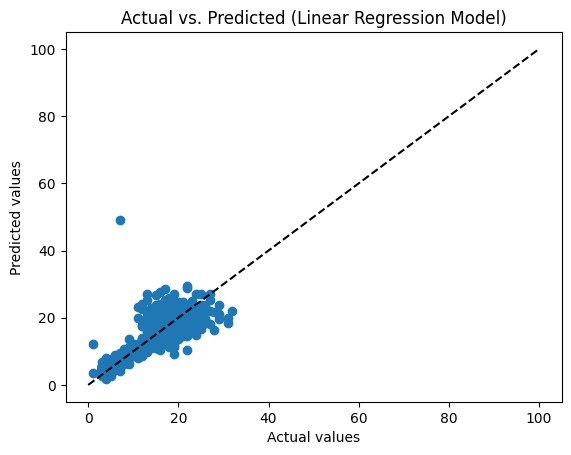

In [ ]:
plt.scatter(y_test, yPrediction)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted (Linear Regression Model)')
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' averaging for multi-class problems
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' averaging for multi-class problems
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' averaging for multi-class problems
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.2619047619047619
Precision: 0.24461373986482318
Recall: 0.2619047619047619
F1 Score: 0.24449465217984492
Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


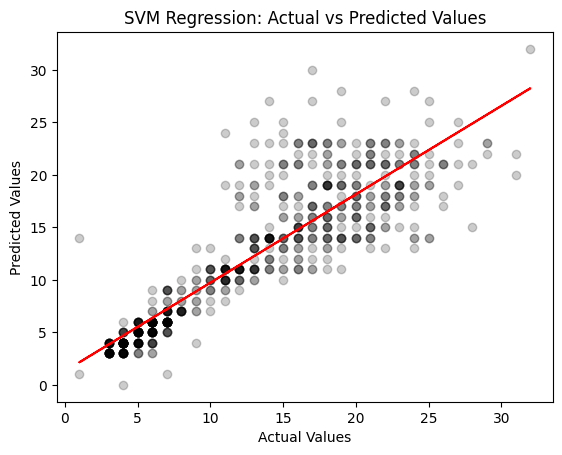

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs Predicted Values')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
decission_score=accuracy_score(y_pred,y_test)

report_decisionTree = classification_report(y_test, y_pred)

print(decission_score)
print(report_decisionTree)


0.44494047619047616
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         3.0       0.70      0.94      0.80        32
         4.0       0.74      0.62      0.67        60
         5.0       0.60      0.52      0.56        50
         6.0       0.56      0.58      0.57        60
         7.0       0.59      0.66      0.62        50
         8.0       0.75      0.43      0.55        14
         9.0       0.24      0.36      0.29        11
        10.0       0.44      0.53      0.48        15
        11.0       0.43      0.48      0.45        25
        12.0       0.58      0.46      0.51        24
        13.0       0.48      0.36      0.41        28
        14.0       0.50      0.58      0.54        24
        15.0       0.24      0.17      0.20        24
        16.0       0.25      0.23      0.24        30
        17.0       0.38      0.57      0.46        28
        18.0       0.38      0.26      0.31        34
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

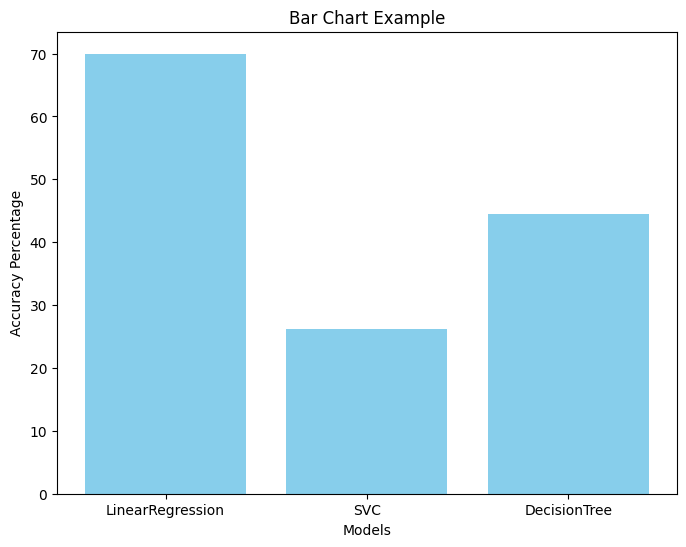

In [ ]:


# Sample data
categories = ['LinearRegression', 'SVC', 'DecisionTree']
values = [r2*100, accuracy*100, decission_score*100]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Percentage')
plt.title('Bar Chart Example')

# Show plot
plt.show()
